[Reference](https://medium.com/design-bootcamp/exploring-decision-trees-how-noise-affects-model-complexity-and-accuracy-e83d511ec68e)

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ε=0.0000: best max_leaf_nodes=20, min Test MSE=0.000053
ε=0.0125: best max_leaf_nodes=20, min Test MSE=0.000211
ε=0.0250: best max_leaf_nodes=12, min Test MSE=0.000755
ε=0.0500: best max_leaf_nodes=7, min Test MSE=0.002781
ε=0.0625: best max_leaf_nodes=5, min Test MSE=0.004457
ε=0.0750: best max_leaf_nodes=5, min Test MSE=0.006120
The epsilons value: [0.0, 0.0125, 0.025, 0.05, 0.0625, 0.075]
The optimal_nodes: [20, 20, 12, 7, 5, 5]
length check: 6 vs 6


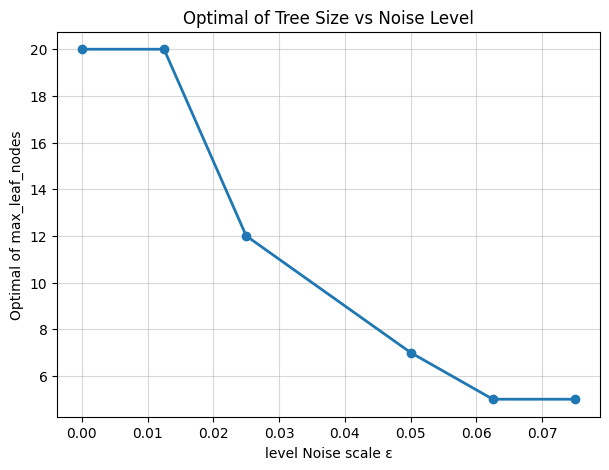

In [2]:
def generateData(nsamp, epsilon=0.025, seed=None):

# I have created generate data funtion and epsilon as gaussian noisee
    if seed is not None:
        np.random.seed(seed)
    X_val = np.random.rand(nsamp, 1) - 0.5              # feature
    y_val = (X_val**2 + epsilon * np.random.randn(nsamp, 1)).ravel()  # target with noise
    return X_val, y_val

# Training and testing
number_train = 200
number_test = 1000

# Noise levels given for test
epsilon_level = [0.0, 0.0125, 0.025, 0.05, 0.0625, 0.075]

# Range of tree sizes to try 2- to 20
leaf_list = list(range(2, 21))

optimal_nodes = []

for eps in epsilon_level:
    # Create datasets with current noise level
    X_train, y_train = generateData(number_train, epsilon=eps, seed=42)
    X_test, y_test = generateData(number_test, epsilon=eps, seed=123)

    mse_results = []  # I prefer this name over mean_se_list

    # Try different tree complexities
    for max_leaves in leaf_list:  # renamed k to be more descriptive
        # Build and train the decision tree
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, random_state=42)
        dt_model.fit(X_train, y_train)

        # Make predictions and calculate error
        predictions = dt_model.predict(X_test)  # more descriptive than y_predcting
        mse = mean_squared_error(y_test, predictions)
        mse_results.append(mse)

    # Find the tree size that gives us the lowest test error
    best_idx = int(np.argmin(mse_results))  # Fixed: was using best_x in print but best_idx in variable
    optimal_leaf_count = leaf_list[best_idx]
    optimal_nodes.append(optimal_leaf_count)

    # Print results for this epsilon level
    min_mse = mse_results[best_idx]
   # Extracting the actual minimum MSE value
    print(f"ε={eps:.4f}: best max_leaf_nodes={optimal_leaf_count}, min Test MSE={min_mse:.6f}")

print("The epsilons value:", epsilon_level)
print("The optimal_nodes:", optimal_nodes)
print("length check:", len(epsilon_level), "vs", len(optimal_nodes))

# drawing a plot
plt.figure(figsize=(7,5))
plt.plot(epsilon_level, optimal_nodes, marker="o", linewidth=2)
plt.xlabel("level Noise scale ε")
plt.ylabel("Optimal of max_leaf_nodes")
plt.title("Optimal of Tree Size vs Noise Level")
plt.grid(True, alpha=0.5)
plt.show()